# **Car Evaluation Dataset**

Source of dataset: https://archive.ics.uci.edu/dataset/19/car+evaluation

# 1. Setup:

In [1]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.preprocessing import OrdinalEncoder

# 2. Load and process the Car Evaluation dataset:

In [2]:
# Load the original car evaluation dataset
original_car_data = pd.read_csv('Datasets/car_data.csv', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

# Get the total number of rows in the dataset
original_car_data.shape[0]  # This returns the number of rows, (1728)

# Display the rows of the original dataset (before any preprocessing)
print(original_car_data.head(1728))  # Adjust the number of rows as needed

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


# 3. Load the modified Car Evaluation dataset:

In [3]:
# Load the car evaluation dataset
car_data = pd.read_csv('Datasets/car_data.csv', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

# Define the category order for the 'buying' column
category_order = [['low', 'med', 'high', 'vhigh']]  # Custom order from low (1) to vhigh (4)

# Step 1: Apply Ordinal Encoding to the 'buying' column (correctly mapped to 1-4)
ordinal_encoder = OrdinalEncoder(categories=category_order)
car_data[['buying']] = ordinal_encoder.fit_transform(car_data[['buying']]) + 1  # Adjust to start from 1, not 0

# Step 2: Ordinal Encode other categorical columns
# Automatically encode remaining columns with a default ordinal scheme
other_categorical_columns = ['maint', 'doors', 'persons', 'lug_boot', 'safety']
car_data[other_categorical_columns] = OrdinalEncoder().fit_transform(car_data[other_categorical_columns])

# Step 3: Transform the target feature into binary classification
# Map the 'class' column: "unacc" to 0, and the rest ("acc", "good", "vgood") to 1
car_data['class'] = car_data['class'].map({'unacc': 0, 'acc': 1, 'good': 1, 'vgood': 1})

# Display the first few rows of the modified dataset
print(car_data.head(1728))


      buying  maint  doors  persons  lug_boot  safety  class
0        4.0    3.0    0.0      0.0       2.0     1.0      0
1        4.0    3.0    0.0      0.0       2.0     2.0      0
2        4.0    3.0    0.0      0.0       2.0     0.0      0
3        4.0    3.0    0.0      0.0       1.0     1.0      0
4        4.0    3.0    0.0      0.0       1.0     2.0      0
...      ...    ...    ...      ...       ...     ...    ...
1723     1.0    1.0    3.0      2.0       1.0     2.0      1
1724     1.0    1.0    3.0      2.0       1.0     0.0      1
1725     1.0    1.0    3.0      2.0       0.0     1.0      0
1726     1.0    1.0    3.0      2.0       0.0     2.0      1
1727     1.0    1.0    3.0      2.0       0.0     0.0      1

[1728 rows x 7 columns]


In [4]:
# Prepare features (X) and target (y)
X_car = car_data.drop('class', axis=1)  # Features
y_car = car_data['class']  # Target

# Define classifiers
classifiers = {
    'Linear SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Define the partitions for training and testing
partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]

# Store results for each classifier, partition, and metric
results = {classifier_name: [] for classifier_name in classifiers}

# Perform training, validation, and testing
for classifier_name, classifier in classifiers.items():
    for train_size, test_size in partitions:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, train_size=train_size, test_size=test_size, random_state=42)
        
        # Train the classifier
        classifier.fit(X_train, y_train)
        
        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
        test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
        
        # Cross-validation for validation accuracy
        validation_accuracy = np.mean(cross_val_score(classifier, X_train, y_train, cv=5))
        
        # Store hyperparameters (if any)
        if hasattr(classifier, 'get_params'):
            hyperparameters = classifier.get_params()
        else:
            hyperparameters = "Default"
        
        # Store the results
        results[classifier_name].append({
            'Train Size': f"{train_size*100}/{test_size*100}",
            'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'Validation Accuracy': validation_accuracy,
            'Hyperparameters': hyperparameters
        })

# 4. Display Classifer Results:

In [5]:
# Display results for each classifier
for classifier_name, classifier_results in results.items():
    print(f"\n{classifier_name} Results:")
    for result in classifier_results:
        print(f"Split: {result['Train Size']}")
        print(f"  Training Accuracy: {result['Training Accuracy']:.4f}")
        print(f"  Testing Accuracy: {result['Testing Accuracy']:.4f}")
        print(f"  Validation Accuracy: {result['Validation Accuracy']:.4f}")
        print(f"  Hyperparameters: {result['Hyperparameters']}\n")


Linear SVM Results:
Split: 20.0/80.0
  Training Accuracy: 0.7594
  Testing Accuracy: 0.7404
  Validation Accuracy: 0.7507
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Split: 50.0/50.0
  Training Accuracy: 0.7488
  Testing Accuracy: 0.7523
  Validation Accuracy: 0.7442
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Split: 80.0/20.0
  Training Accuracy: 0.7554
  Testing Accuracy: 0.7312
  Validation Accuracy: 0.7467
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 20

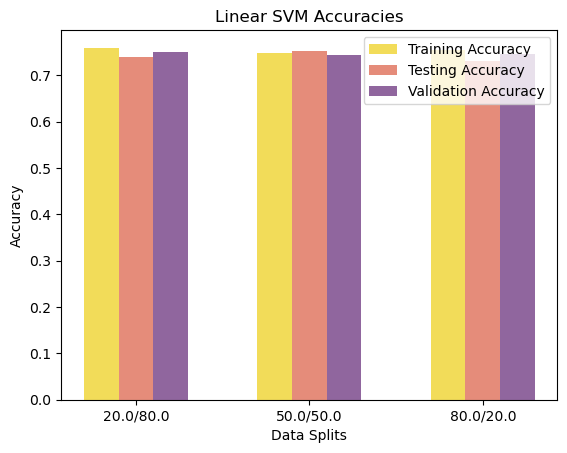

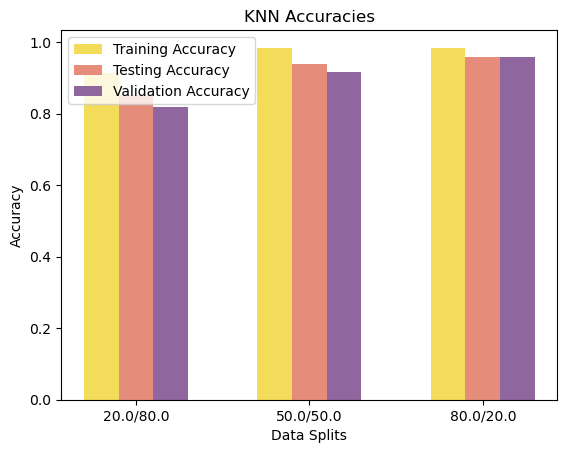

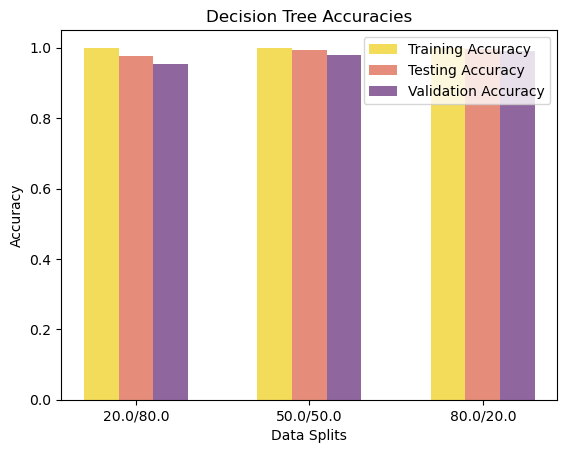

In [6]:
# Visualize accuracy results with bar charts
for classifier_name, classifier_results in results.items():
    train_accuracies = [result['Training Accuracy'] for result in classifier_results]
    test_accuracies = [result['Testing Accuracy'] for result in classifier_results]
    validation_accuracies = [result['Validation Accuracy'] for result in classifier_results]
    
    splits = [result['Train Size'] for result in classifier_results]
    
    # Create a bar chart for each classifier
    bar_width = 0.2
    index = np.arange(len(splits))

    plt.bar(index, train_accuracies, bar_width, label='Training Accuracy', color='#f2dc59')
    plt.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy', color='#e58c7a')
    plt.bar(index + 2*bar_width, validation_accuracies, bar_width, label='Validation Accuracy', color='#90669e')

    plt.xlabel('Data Splits')
    plt.ylabel('Accuracy')
    plt.title(f'{classifier_name} Accuracies')
    plt.xticks(index + bar_width, splits)
    plt.legend()
    plt.show()